In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from datetime import date
import math
import datetime
from google.colab import files
import io
from google.colab import files
import datetime as dt
from datetime import datetime
import re
import nltk
from nltk.corpus import stopwords
import string

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

myfile1 = drive.CreateFile({'id': '1R7bz-29tzLfcMx7OzgLqZz7lLnxvY7yg'})
myfile1.GetContentFile('footfall.csv')

myfile2 = drive.CreateFile({'id': '12F88qd-WldLQGdWObjNcCO2c5Qc2I3cF'})
myfile2.GetContentFile('2015_sales_data.csv')

myfile3 = drive.CreateFile({'id': '17CrGGI69zYHc59CdSQ8kr1KYwQpq4zwb'})
myfile3.GetContentFile('historical_discount.csv')

myfile4 = drive.CreateFile({'id': '1pDlEqe-2WWh2K-prxr5gpWV6UNrRZLTu'})
myfile4.GetContentFile('2016_sales_data.csv')

myfile5 = drive.CreateFile({'id': '1gT2kYugHNDEH8XXuMN8I1CRwaH7SJj5Z'})
myfile5.GetContentFile('2017_sales_data.csv')

myfile6 = drive.CreateFile({'id': '1D8pplLHjKbiMsr00tS9XMwjfSf9o_Irt'})
myfile6.GetContentFile('2018_sales_data.csv')

myfile7 = drive.CreateFile({'id': '1jutoCKhPyHBVaEa0brbcfqIQZPXW8P7Y'})
myfile7.GetContentFile('expected_discount.csv')

myfile8 = drive.CreateFile({'id': '1TdbzqbLrLaydm-q9h-YJF_iEVaOrZxr-'})
myfile8.GetContentFile('test_data.csv')



In [3]:
footfall = pd.read_csv('footfall.csv',header = 0)

df2015 = pd.read_csv('2015_sales_data.csv', header=0)
df2016 = pd.read_csv('2016_sales_data.csv', header=0)
df2017 = pd.read_csv('2017_sales_data.csv', header=0)
df2018 = pd.read_csv('2018_sales_data.csv', header=0)

df = pd.concat([df2015,df2016,df2017,df2018])
histdisc = pd.read_csv('historical_discount.csv', header=0)

In [4]:
dict = {"Mumbai": 4, "Delhi": 5, "Bangalore": 7, "Kolkata": 1, "Chennai": 6, "Hyderabad": 8, "Ahmedabad": 9, "Jaipur": 3, "Lucknow": 10, "Other": 2}

In [5]:
demo = pd.melt(footfall, id_vars =['city'], var_name = 'date', value_name = 'footfall')

In [6]:
demo["city"] = demo["city"].map(dict)

In [7]:
demo['date'] = pd.to_datetime(demo.date)

In [8]:
demo.head()

,city,date,footfall
0,9,2015-01-02,9384.0
1,7,2015-01-02,16644.0
2,6,2015-01-02,19544.0
3,5,2015-01-02,16832.0
4,8,2015-01-02,13588.0


In [9]:
hd = pd.melt(histdisc, id_vars= ['date','product'], var_name = 'city', value_name = 'discount_ind')

In [10]:
city_map = {"Discount_Mumbai": 4, "Discount_Delhi": 5, "Discount_Bangalore": 7, "Discount_Kolkata": 1, "Discount_Chennai": 6, "Discount_Hyderabad": 8, "Discount_Ahmedabad": 9, "Discount_Jaipur": 3, "Discount_Lucknow": 10, "Discount_Other": 2}

In [11]:
print(city_map)

{'Discount_Mumbai': 4, 'Discount_Delhi': 5, 'Discount_Bangalore': 7, 'Discount_Kolkata': 1, 'Discount_Chennai': 6, 'Discount_Hyderabad': 8, 'Discount_Ahmedabad': 9, 'Discount_Jaipur': 3, 'Discount_Lucknow': 10, 'Discount_Other': 2}


In [12]:
hd['city'] = hd['city'].map(city_map)

In [13]:
df['date'] = pd.to_datetime(df.date)

In [14]:
hd['date'] = pd.to_datetime(hd.date)

In [15]:
hd.head()

,date,product,city,discount_ind
0,2016-04-29,45,9,0.0
1,2016-04-29,255,9,0.0
2,2016-04-29,316,9,0.0
3,2016-04-29,594,9,0.0
4,2016-04-29,664,9,0.0


In [16]:
df.head()

,date,city,product,sales
0,2015-01-02,1,1,24.0
1,2015-01-02,1,2,144.0
2,2015-01-02,1,3,84.0
3,2015-01-02,1,4,24.0
4,2015-01-02,1,5,8.0


In [15]:
data = df.merge(demo, how="right", on=["date","city"])

In [16]:
data = data[data["product"].notna()]

In [17]:
# Merging all datasets (sales, footfall, discount indicator)
data2 = data.merge(hd, how="left", on=["date","city","product"])
data2.head()

,date,city,product,sales,footfall,discount_ind
0,2015-01-02,1,1,24.0,13948.0,NaN
1,2015-01-02,1,2,144.0,13948.0,NaN
2,2015-01-02,1,3,84.0,13948.0,NaN
3,2015-01-02,1,4,24.0,13948.0,NaN
4,2015-01-02,1,5,8.0,13948.0,NaN


In [18]:
# Assigning month, weekday, year and isHoliday
data2 = data2.assign(month = pd.DatetimeIndex(data2['date']).month)
data2 = data2.assign(weekday = pd.DatetimeIndex(data2['date']).weekday)
data2 = data2.assign(year = pd.DatetimeIndex(data2['date']).year)

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=data2.date.min(), end=data2.date.max())

data2 = data2.assign(Holiday = data2['date'].isin(holidays))
data2.head()

,date,city,product,sales,footfall,discount_ind,month,weekday,year,Holiday
0,2015-01-02,1,1,24.0,13948.0,NaN,1,4,2015,False
1,2015-01-02,1,2,144.0,13948.0,NaN,1,4,2015,False
2,2015-01-02,1,3,84.0,13948.0,NaN,1,4,2015,False
3,2015-01-02,1,4,24.0,13948.0,NaN,1,4,2015,False
4,2015-01-02,1,5,8.0,13948.0,NaN,1,4,2015,False


In [21]:
mean_city_sales = data2.groupby(by=['city'])['sales'].mean()
mean_city_sales.head()

city
1    60.578402
2    33.464527
3    38.039881
4    73.139721
5    63.700337
Name: sales, dtype: float64

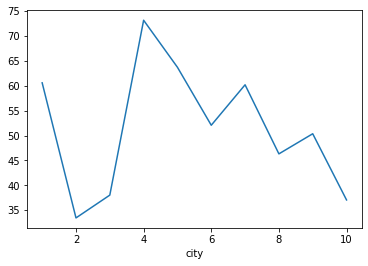

In [22]:
mean_city_sales.plot.line() 

In [23]:
monthly_sales = data2.groupby(['month'])['sales'].sum()
monthly_sales.head()

month
1    1.080760e+08
2    8.970343e+07
3    1.130799e+08
4    1.019977e+08
5    6.785396e+07
Name: sales, dtype: float64

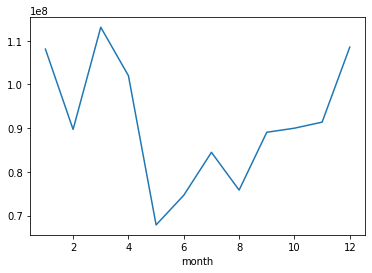

In [24]:
monthly_sales.plot.line() 

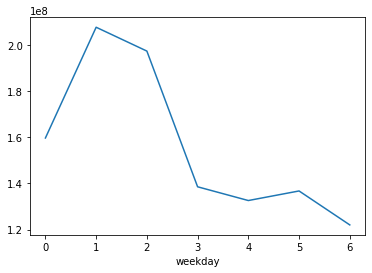

In [25]:
weekday_sales = data2.groupby(['weekday'])['sales'].sum()
weekday_sales.head()
weekday_sales.plot.line() 

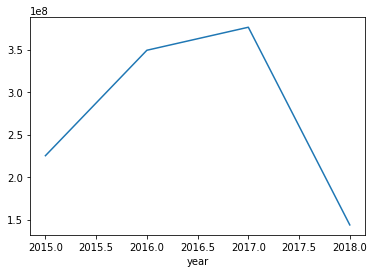

In [26]:
yearly_sales = data2.groupby(['year'])['sales'].sum()
yearly_sales.head()
yearly_sales.plot.line() 

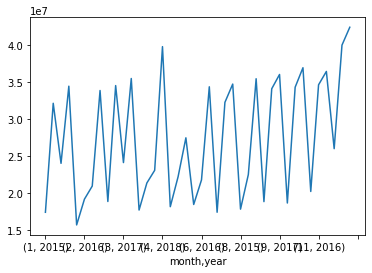

In [27]:
ym = data2.groupby(['month','year'])['sales'].sum()
ym.head()
ym.plot.line() 

In [28]:
# Extracting data of only city 1
city1 = data2[(data2.city == 1)&(data2.discount_ind.notna())]

In [29]:
# city1 = city1.assign(month = pd.DatetimeIndex(city1['date']).month)
# city1 = city1.assign(weekday = pd.DatetimeIndex(city1['date']).weekday)
# # city1.assign(month = pd.DatetimeIndex(city1['date']).month)
# # city1['weekday'] = pd.DatetimeIndex(city1['date']).weekday
# # city1
# from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# cal = calendar()
# holidays = cal.holidays(start=city1.date.min(), end=city1.date.max())

# city1 = city1.assign(Holiday = city1['date'].isin(holidays))
city1.head()

,date,city,product,sales,footfall,discount_ind,month,weekday,year,Holiday
6515389,2016-04-29,1,45,4.0,11272.0,0.0,4,4,2016,False
6515590,2016-04-29,1,255,80.0,11272.0,0.0,4,4,2016,False
6515646,2016-04-29,1,316,676.0,11272.0,0.0,4,4,2016,False
6515906,2016-04-29,1,594,16.0,11272.0,0.0,4,4,2016,False
6515972,2016-04-29,1,664,4.0,11272.0,0.0,4,4,2016,False


In [30]:
finalcity1 = city1.groupby(by=["date","city","footfall","month","weekday","Holiday"]).mean()
finalcity1.drop(columns="product",inplace=True)
finalcity1 = finalcity1.reset_index()


In [31]:
from statsmodels.formula.api import ols

train = finalcity1.iloc[:450,:]
test = finalcity1.iloc[450:,:]


fit1=ols(formula="footfall~ C(month) * C(Holiday) + C(weekday) * C(Holiday) + I(discount_ind**6) + year",data=train).fit()
prediction1 = fit1.predict(test)

actual=finalcity1.iloc[450:,:]["footfall"].values
RMSPE1=(np.mean(((prediction1-actual)/actual)**2))**0.5

print(RMSPE1)


0.09509069387683611


In [32]:
# model="footfall~ C(month) * C(Holiday) + C(weekday) * C(Holiday) + I(discount_ind**6)"
# actual=test["footfall"].values

# def function(alpha_value):
#   prediction1=ols(model,data=train).fit_regularized(alpha=alpha_value, L1_wt=0).predict(test)

#   A1=(np.mean(((prediction1-actual)/actual)**2))**0.5
#   return A1

# alpha_array= np.arange(0.0,0.05,0.001)
# RSMPE_array=[function(alpha) for alpha in alpha_array]
# plt.plot(alpha_array,RSMPE_array)
# plt.show()

In [33]:
# prediction1= ols(model,data=train).fit_regularized(alpha=0, L1_wt=0).predict(test)
# A1=(np.mean(((prediction1-actual)/actual)**2))**0.5
# print(A1)

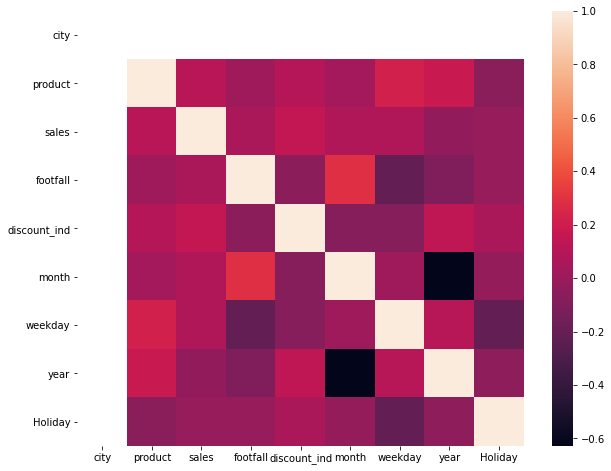

In [34]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = city1.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [19]:
#Complete model training -  for footfall prediction
data2train = data2.groupby(by=["date","city","footfall","month","weekday","Holiday","year"]).mean()
data2train.drop(columns="product",inplace=True)
data2train = data2train.reset_index()
data2train.head()

,date,city,footfall,month,weekday,Holiday,year,sales,discount_ind
0,2015-01-02,1,13948.0,1,4,False,2015,80.134381,NaN
1,2015-01-02,2,8572.0,1,4,False,2015,48.072836,NaN
2,2015-01-02,3,13000.0,1,4,False,2015,48.742570,NaN
3,2015-01-02,4,19284.0,1,4,False,2015,95.997388,NaN
4,2015-01-02,5,16832.0,1,4,False,2015,89.576808,NaN


In [36]:
# plt.scatter(data2train['month'],data2train['footfall'])
# plt.xlabel('month')
# plt.ylabel('footfall')

In [37]:
# Scenario 1 - drop all NAN from train and replace NaN as O in test -----------------------------

# trainNAN = data2train[(data2train.discount_ind.notna())]
# trainNAN.head()

# train1 = data2train.iloc[:9600,:]
# train1 = train1[(train1.discount_ind.notna())]
# train1.head()
# train1.shape


In [38]:
# test1 = data2train.iloc[9600:,:].copy()
# test1.loc[test1['discount_ind'].isna(),'discount_ind'] = 0
# test1.head()

In [39]:
# Model 1
# from statsmodels.formula.api import ols

# trainmod = train1
# testmod = test1
# actual=data2train.iloc[9600:,:]["footfall"].values

# fit=ols(formula="footfall~ C(month) * C(Holiday) + C(weekday) * C(Holiday) + I(discount_ind**6) + year + C(city)",data=trainmod).fit()
# prediction = fit.predict(testmod)

# RMSPE2=(np.mean(((prediction-actual)/actual)**2))**0.5

# print(RMSPE2)

In [20]:
data2train2 = data2train.sample(frac = 1)

In [41]:
# Scenario 2 -  Drop NaN from train and Replace NAN with city mean discount in test ------------------
# data2train2 = data2train.sample(frac = 1)
# train2 = data2train2.iloc[:9600,:]
# train2 = train2[(train2.discount_ind.notna())]
# train2.shape

In [42]:
# test2 = data2train2.iloc[9600:,:]
# test2.discount_ind.isna().sum()
# test2.shape

In [43]:
# mean = test2.groupby(['city'])[['discount_ind']].mean()
# mean

In [44]:
# y = test2[test2.discount_ind.isna()].copy()
# y.drop(columns = 'discount_ind', inplace = True)
# y1 = y.merge(mean, how = 'left', on = 'city')

In [45]:
# test2fin = test2.merge(y1, how='left', on=['date','city','footfall','month','weekday','Holiday','year','sales'])
# test2fin.head()

In [46]:
# test2fin.discount_ind_x.fillna(test2fin.discount_ind_y, inplace=True)
# del test2fin['discount_ind_y']
# test2fin.head()

In [47]:
# test2fin = test2fin.rename(columns={"discount_ind_x" : "discount_ind"})
# test2fin.head()

In [48]:
# from statsmodels.formula.api import ols

# trainmod = train2
# testmod = test2fin
# actual=data2train2.iloc[9600:,:]["footfall"].values

# fit=ols(formula="footfall~ C(month) * C(Holiday) + C(weekday) * C(Holiday) + I(discount_ind**6) + year + C(city)",data=trainmod).fit()
# prediction = fit.predict(testmod)

# RMSPE2=(np.mean(((prediction-actual)/actual)**2))**0.5

# print(RMSPE2)

In [21]:
data2train3 = data2train2.sample(frac = 1)

In [22]:
data2train4 = data2train3.sample(frac = 1)

In [51]:
# Scenario 3 - direct split and remove discount factor from model

# train3 = data2train4.iloc[:9600,:]
# test3 = data2train4.iloc[9600:,:]
#test3.discount_ind.isna().sum()

In [52]:
# from statsmodels.formula.api import ols

# trainmod = train3
# testmod = test3
# actual = data2train4.iloc[9600:,:]["footfall"].values

# fit=ols(formula="footfall~ C(month) * C(Holiday) + C(weekday) * C(Holiday) + year + C(city)",data=trainmod).fit()
# prediction = fit.predict(testmod)

# RMSPE2=(np.mean(((prediction-actual)/actual)**2))**0.5

# print(RMSPE2)

In [31]:
# Using XGBoost for dealing with null values for predicting footfall


train4 = data2train4.iloc[:9600,:]
test4 = data2train4.iloc[9600:,:]

In [32]:
x_train = train4[['month','Holiday','weekday','discount_ind','year','city']]
y_train = train4[['footfall']]

In [33]:
x_test = test4[['month','Holiday','weekday','discount_ind','year','city']]
y_test = test4[['footfall']]

In [23]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [35]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[10:52:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

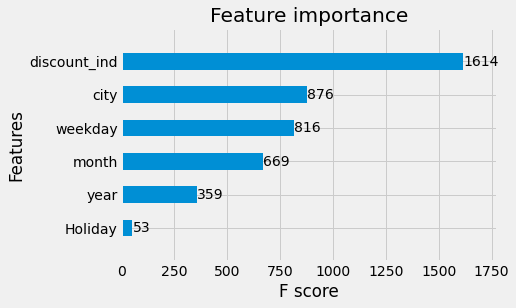

In [36]:
_ = plot_importance(reg, height=0.5)

In [37]:
test4['footfall_pred'] = reg.predict(x_test)
all = pd.concat([test4, train4], sort=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
all.head()

,date,city,footfall,month,weekday,Holiday,year,sales,discount_ind,footfall_pred
6637,2016-10-29,8,8912.0,10,5,False,2016,29.588944,0.837719,10347.240234
8043,2017-03-21,4,21056.0,3,1,False,2017,84.613334,0.205128,20211.154297
6575,2016-10-23,6,11100.0,10,6,False,2016,35.445136,0.304348,11682.215820
1411,2015-05-23,2,6400.0,5,5,False,2015,24.093225,NaN,6379.849121
1150,2015-04-27,1,13560.0,4,0,False,2015,62.478616,NaN,14056.899414


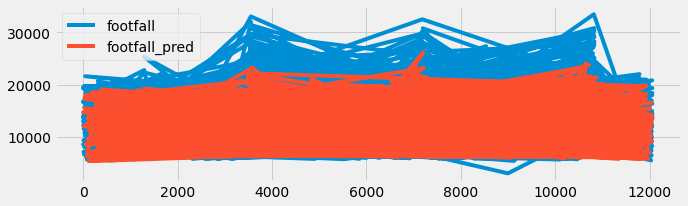

In [39]:
_ = all[['footfall','footfall_pred']].plot(figsize=(10, 3))

In [40]:
RMSPE2=(np.mean(((test4.footfall_pred-test4.footfall)/test4.footfall)**2))**0.5
RMSPE2

0.10603534481381488

In [24]:
test_data = pd.read_csv('test_data.csv', header=0)
expdisc = pd.read_csv('expected_discount.csv', header=0)

In [25]:
test_data.head()

,id,date,city,product
0,1,2018-05-01,1,1292
1,2,2018-05-01,1,1
2,3,2018-05-01,1,2
3,4,2018-05-01,1,3
4,5,2018-05-01,1,4


In [26]:
ed = pd.melt(expdisc, id_vars= ['date','product'], var_name = 'city', value_name = 'discount_ind')

In [27]:
ed.head()

,date,product,city,discount_ind
0,2018-05-01,2,Discount_Ahmedabad,0.0
1,2018-05-01,30,Discount_Ahmedabad,1.0
2,2018-05-01,31,Discount_Ahmedabad,1.0
3,2018-05-01,32,Discount_Ahmedabad,1.0
4,2018-05-01,33,Discount_Ahmedabad,1.0


In [28]:
ed['city'] = ed['city'].map(city_map)
ed['date'] = pd.to_datetime(ed.date)

In [29]:
ed.head()

,date,product,city,discount_ind
0,2018-05-01,2,9,0.0
1,2018-05-01,30,9,1.0
2,2018-05-01,31,9,1.0
3,2018-05-01,32,9,1.0
4,2018-05-01,33,9,1.0


In [30]:
test_data['date'] = pd.to_datetime(test_data.date)

In [31]:
test_data = test_data.merge(ed, how="left", on=["date","city","product"])
test_data.head()

,id,date,city,product,discount_ind
0,1,2018-05-01,1,1292,NaN
1,2,2018-05-01,1,1,NaN
2,3,2018-05-01,1,2,1.0
3,4,2018-05-01,1,3,NaN
4,5,2018-05-01,1,4,NaN


In [32]:
test_data = test_data.assign(month = pd.DatetimeIndex(test_data['date']).month)
test_data = test_data.assign(weekday = pd.DatetimeIndex(test_data['date']).weekday)
test_data = test_data.assign(year = pd.DatetimeIndex(test_data['date']).year)

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=test_data.date.min(), end=test_data.date.max())

test_data = test_data.assign(Holiday = test_data['date'].isin(holidays))
test_data.head()

,id,date,city,product,discount_ind,month,weekday,year,Holiday
0,1,2018-05-01,1,1292,NaN,5,1,2018,False
1,2,2018-05-01,1,1,NaN,5,1,2018,False
2,3,2018-05-01,1,2,1.0,5,1,2018,False
3,4,2018-05-01,1,3,NaN,5,1,2018,False
4,5,2018-05-01,1,4,NaN,5,1,2018,False


In [72]:
# -------- Footfall predict using OLS model-----------------
# from statsmodels.formula.api import ols

# trainmod = data2train.copy()
# testmod = test_data.copy()
# # actual = data2train3.iloc[9600:,:]["footfall"].values

# fit=ols(formula="footfall~ C(month) * C(Holiday) + C(weekday) * C(Holiday) + year + C(city)",data=trainmod).fit()
# prediction = fit.predict(testmod)

# # RMSPE2=(np.mean(((prediction-actual)/actual)**2))**0.5

# # print(RMSPE2)

In [73]:
# test_data = test_data.assign(footfall = prediction)
# test_data.head()

In [74]:
# data2train.copy()

In [75]:
# --------------- Sales Predcition using OLS model ----------------

# from statsmodels.formula.api import ols

# trainmod = data2.copy()
# testmod = test_data.copy()
# # actual = data2train3.iloc[9600:,:]["footfall"].values

# fit=ols(formula="sales~footfall+ C(month) * C(Holiday) + C(weekday) * C(Holiday) +C(product) + year + C(city)",data=trainmod).fit()
# fit.predict(testmod)

# # RMSPE2=(np.mean(((prediction-actual)/actual)**2))**0.5

# # print(RMSPE2)

In [44]:
data2train.head()

,date,city,footfall,month,weekday,Holiday,year,sales,discount_ind
0,2015-01-02,1,13948.0,1,4,False,2015,80.134381,NaN
1,2015-01-02,2,8572.0,1,4,False,2015,48.072836,NaN
2,2015-01-02,3,13000.0,1,4,False,2015,48.742570,NaN
3,2015-01-02,4,19284.0,1,4,False,2015,95.997388,NaN
4,2015-01-02,5,16832.0,1,4,False,2015,89.576808,NaN


In [77]:
# Predicting Footfall for Test Data Set usin XGBoost-------------------------------
# Footfall is independant of product

In [33]:
x_train_fin = data2train[['city','month','weekday','Holiday','discount_ind','year']]
y_train_fin = data2train[['footfall']]

In [34]:
x_test_fin = test_data[['city','month','weekday','Holiday','discount_ind','year']]
#y_test_fin = test_data[['foofall']]

In [35]:
reg_fin = xgb.XGBRegressor(n_estimators=1000)

In [36]:
reg_fin.fit(x_train_fin, y_train_fin)

[11:04:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [37]:
test_data['footfall_pred'] = reg_fin.predict(x_test_fin)

In [38]:
test_data.head()

,id,date,city,product,discount_ind,month,weekday,year,Holiday,footfall_pred
0,1,2018-05-01,1,1292,NaN,5,1,2018,False,14127.418945
1,2,2018-05-01,1,1,NaN,5,1,2018,False,14127.418945
2,3,2018-05-01,1,2,1.0,5,1,2018,False,15192.502930
3,4,2018-05-01,1,3,NaN,5,1,2018,False,14127.418945
4,5,2018-05-01,1,4,NaN,5,1,2018,False,14127.418945


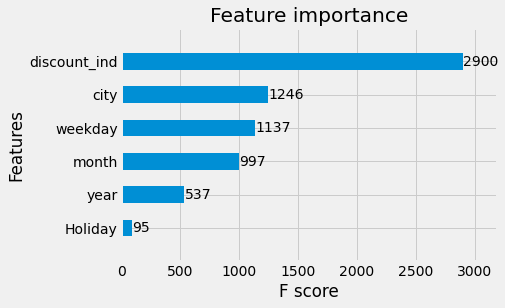

In [56]:
_ = plot_importance(reg_fin, height=0.5)

In [39]:
test_data.rename(columns={"footfall_pred":"footfall"}, inplace=True)

In [40]:
test_data.head()

,id,date,city,product,discount_ind,month,weekday,year,Holiday,footfall
0,1,2018-05-01,1,1292,NaN,5,1,2018,False,14127.418945
1,2,2018-05-01,1,1,NaN,5,1,2018,False,14127.418945
2,3,2018-05-01,1,2,1.0,5,1,2018,False,15192.502930
3,4,2018-05-01,1,3,NaN,5,1,2018,False,14127.418945
4,5,2018-05-01,1,4,NaN,5,1,2018,False,14127.418945


In [85]:
# Model Analysis for Sales XGBoost-----------------------

In [86]:
data2.shape

(21086397, 10)

In [54]:
#using limited data to test model for sales

d = data2.sample(frac=1)
d = d.iloc[:1000000,:]

In [93]:

train_s = d.iloc[:70000,:]
test_s = d.iloc[70000:,:]

In [94]:
x_trains = train_s[['discount_ind','year','city','footfall','product','month','Holiday','weekday']]
y_trains = train_s[['sales']]

In [95]:
#x_tests = test_s[['month','Holiday','weekday','discount_ind','year','city','footfall','product']]

x_tests = test_s[['discount_ind','year','city','footfall','product','month','Holiday','weekday']]
y_tests = test_s[['sales']]

In [96]:
regs = xgb.XGBRegressor(n_estimators = 1000)
regs
regs.fit(x_trains, y_trains,eval_set=[(x_trains, y_trains), (x_tests, y_tests)],
        early_stopping_rounds=50,
       verbose=False)

[09:23:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

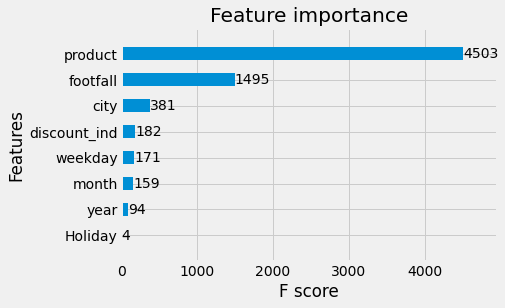

In [97]:
_ = plot_importance(regs, height = 0.5)

In [98]:
test_s['sales_pred'] = regs.predict(x_tests)
#all = pd.concat([test4, train4], sort=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
test_s.head()

,date,city,product,sales,footfall,discount_ind,month,weekday,year,Holiday,sales_pred
5418462,2016-02-19,4,350,4.000,16096.0,NaN,2,4,2016,False,56.585602
19241932,2018-02-15,7,57,56.000,13872.0,NaN,2,3,2018,False,41.033562
18676545,2018-01-23,4,2439,67.684,19928.0,NaN,1,1,2018,False,52.350712
20485548,2018-04-06,5,2880,76.000,12660.0,NaN,4,4,2018,False,37.585827
1574487,2015-05-13,4,327,72.000,14400.0,NaN,5,2,2015,False,62.137245


In [ ]:
# alls = pd.concat([test_s, train_s], sort=False)
# _ = alls[['sales','sales_pred']].plot(figsize=(10, 3))

In [ ]:
# --------------- Sales Predcition using OLS model ----------------

from statsmodels.formula.api import ols

trainmod = d.iloc[:700000,:]
testmod = d.iloc[700000:,:]
actual = d.iloc[700000:,:]["sales"].values

fit=ols(formula="sales~ footfall+ C(month) * C(Holiday) + C(weekday) * C(Holiday) +C(product) + year + C(city)",data=trainmod).fit()
prediction = fit.predict(testmod)

RMSPE2=(np.mean(((prediction-actual)/actual)**2))**0.5

print(RMSPE2)

In [ ]:
# Predicting Sales for Test Data Set --------------------

In [41]:
d1 = data2.sample(frac=1)
d1 = d1.iloc[:1500000,:]

In [59]:
data2.shape

(21086397, 10)

In [42]:
x_train_sales = d1[['discount_ind','year','city','footfall','product','month','Holiday','weekday']]
y_train_sales = d1[['sales']]
x_test_sales = test_data[['discount_ind','year','city','footfall','product','month','Holiday','weekday']]
x_train_sales.shape

(1500000, 8)

In [43]:
reg_sales = xgb.XGBRegressor(n_estimators=1000)

In [44]:
reg_sales.fit(x_train_sales, y_train_sales)

[11:05:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [45]:
test_data['sales_pred'] = reg_sales.predict(x_test_sales)

In [46]:
test_data.shape

(2262135, 11)

In [47]:
from google.colab import  drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [48]:
test_data.to_csv('/drive/My Drive/Dataset - Sales Forecast/Output/output_fin.csv')

In [49]:
test_data.tail()

,id,date,city,product,discount_ind,month,weekday,year,Holiday,footfall,sales_pred
2262130,2262131,2018-07-31,10,3163,NaN,7,1,2018,False,11390.833984,36.697437
2262131,2262132,2018-07-31,10,3164,NaN,7,1,2018,False,11390.833984,36.697437
2262132,2262133,2018-07-31,10,3157,NaN,7,1,2018,False,11390.833984,32.832241
2262133,2262134,2018-07-31,10,3165,NaN,7,1,2018,False,11390.833984,36.697437
2262134,2262135,2018-07-31,10,3057,NaN,7,1,2018,False,11390.833984,30.204393


In [50]:
header = test_data[['id', 'sales_pred']] 

In [51]:
header.shape

(2262135, 2)

In [52]:
header.rename(columns={"sales_pred":"sales"}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
header.head()
header.reset_index(drop=True, inplace=True)

In [60]:
header.head()

,id,sales
0,1,48.104950
1,2,37.825516
2,3,101.585007
3,4,110.565826
4,5,40.901951


In [64]:
header.reset_index(drop=True)

,id,sales
0,1,48.104950
1,2,37.825516
2,3,101.585007
3,4,110.565826
4,5,40.901951
...,...,...
2262130,2262131,36.697437
2262131,2262132,36.697437
2262132,2262133,32.832241
2262133,2262134,36.697437


In [65]:
header.to_csv('/drive/My Drive/Dataset - Sales Forecast/Output/Akshita_Lakkad_21454_prediction_final.csv', index=False)